In [1]:
from spiders import W, ZBox, Z, Id, Swap, boxes
from pyfile import eval, eq
import numpy as np

In [2]:
def T(A, n):
    # return A^n
    if n == 1: return A
    return A @ T(A, n-1)

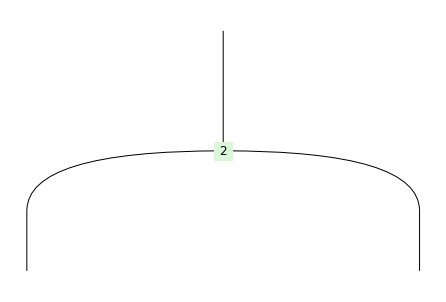

In [3]:
ZBox(1, 2, 2).draw()

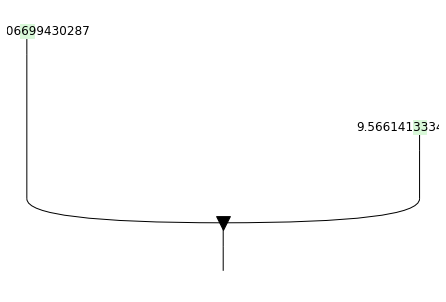

In [4]:

for _ in range(10):
    a, b = np.random.rand(2) * 10
    abox = ZBox(0, 1, a)
    bbox = ZBox(0, 1, b)
    addbox = abox @ bbox >> W().dagger()
    assert eq(addbox, ZBox(0, 1, a+b))
addbox.draw()

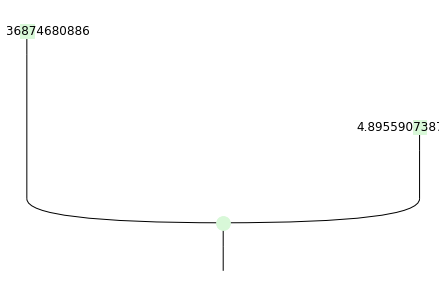

In [5]:
zm = Z(2, 1)
zcm = Z(1, 2)
for _ in range(10):
    a, b = np.random.rand(2) * 10
    abox = ZBox(0, 1, a)
    bbox = ZBox(0, 1, b)
    timesbox = abox @ bbox >> zm
    assert eq(timesbox, ZBox(0, 1, a*b))
timesbox.draw()

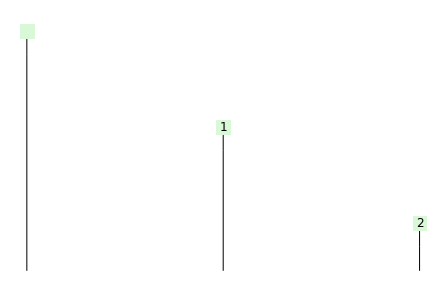

In [7]:


boxes([0, 1, 2]).draw()

### distrib

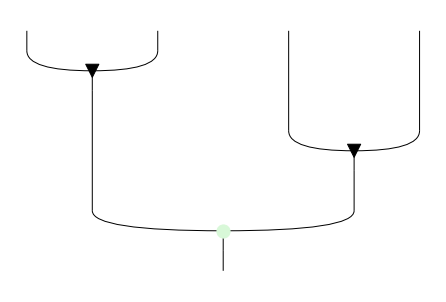

In [8]:
s22 = W(2, False) @ W(2, False) >> Z(2, 1)
s22.draw()

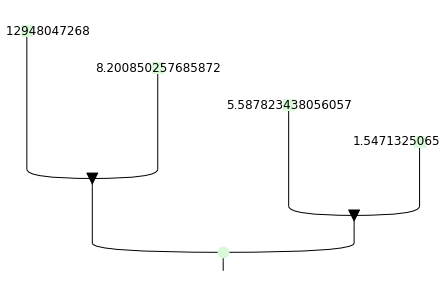

In [9]:
for _ in range(10):
    nums = np.random.rand(4) * 10
    distribbox = boxes(nums) >> s22
    a, b, c, d = nums
    assert eq(distribbox, ZBox(0, 1, (a + b) * (c + d)))
distribbox.draw()

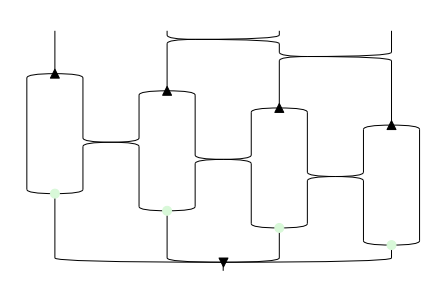

True

In [10]:
#fs = W(4) >> T(Z(1, 2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(W(2).T(), 4) >> Id(2) @ Swap >> Id(1) @ Swap @ Id(1)
#fs.draw()

fs = Id(1) @ Swap @ Id(1) >> Id(2) @ Swap  >> T(W(2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1) >> T(Z(2, 1), 4) >> W(4).dagger()
fs.draw()

eq(fs, s22)


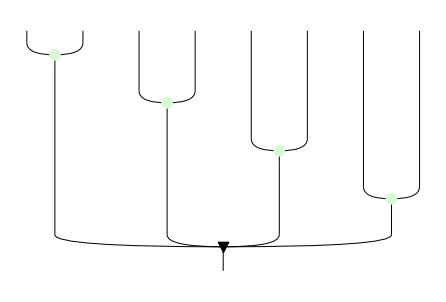

In [11]:
#ac + ad + bc + bd
fs22 = T(zm, 4) >> W(4, False)
fs22.draw()

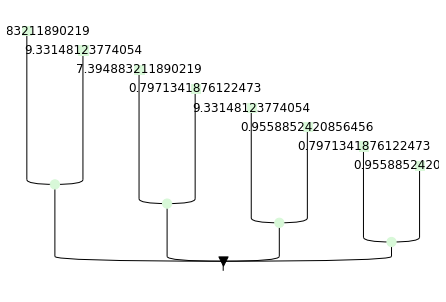

In [12]:
for _ in range(10):
    a, b, c, d = np.random.rand(4) * 10
    abox = ZBox(0, 1, a)
    bbox = ZBox(0, 1, b)
    cbox = ZBox(0, 1, c)
    dbox = ZBox(0, 1, d)
    distribbox = abox @ bbox @ cbox @ dbox >> s22
    distribbox2 = abox @ bbox @ cbox @ dbox >> fs
    distribbox3 = boxes([a, c, a, d, c, b, d, b]) >> fs22

    
    assert eq(distribbox, distribbox2)
    assert eq(distribbox2, distribbox3)
distribbox3.draw()

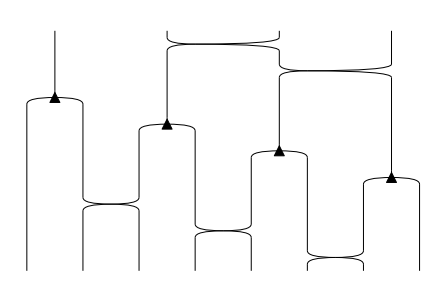

In [13]:
copswaps = Id(1) @ Swap @ Id(1) >> Id(2) @ Swap  >> T(W(2), 4) >> Id(1) @ Swap @ Swap @ Swap @ Id(1)
copswaps.draw()

In [14]:
a,b,c,d = np.random.randint(0, 10, 4)
d1 = boxes([a, b, c, d]) >> copswaps
d2 = boxes([a, c, a, d, c, b, d, b])

print("just swaps:", eq(d1, d2))
print("with zs:", eq(d1 >> T(zm, 4), d2 >> T(zm, 4)))
print("with w:", eq(d1 >> T(zm, 4) >> W(4, False), d2 >> T(zm, 4) >> W(4, False)))


just swaps: False
with zs: False
with w: True


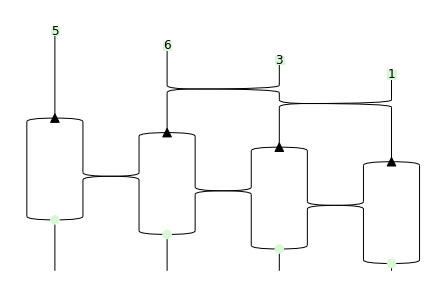

In [15]:
(d1 >> T(zm, 4)).draw()

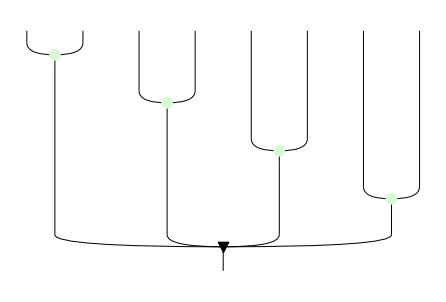

In [16]:
fs22.draw()

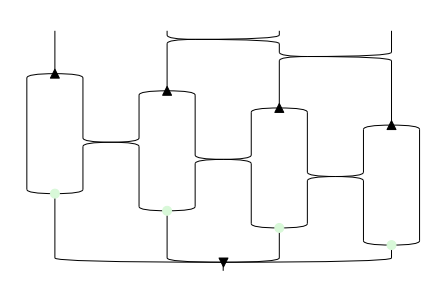

In [17]:
fs.draw()

### box copy

$a\times \_ + a \times \_ = a \times (\_ + \_)$

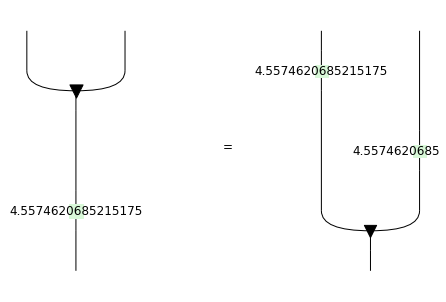

In [18]:
from discopy.drawing import Equation
for _ in range(10):
    a = np.random.rand() * 10
    a1 = W(2, False) >> ZBox(1, 1, a)
    a2 = boxes([a, a], False) >> W(2, False)

    
    assert eq(a1, a2)

Equation(a1, a2).draw()